# Exercise 1

### Q:

Describe the steps required for performing PCA. How SVD can be used within this process

### A:

The key idea of PCA is to extract the direction along which the data has the most variance. This techniques is usefull to analyze any kind of data representable in a matrix format. Singular value decomposition is the method by which pricipal components are extracted .

1. Center or standardize the dataset: subtracting the mean and, in case that different features have different unit of measurement dividing by the standard deviation ensures that all features contribute equally to the analysis, even when some of them have different scales.
2. Compute the left eigenvectors of the dataset if in it each row is a sample or the right eigenvectors if each column is a sample. 
	- These singular vectors can be computed via the covariance matrix of the dataset. The eigenvectors of the covariance matrix represent the principal components of the data, and the corresponding eigenvalues represent the amount of variance explained by each principal component. The eigenvalues of the dataset are the square of the singular values of the covariance matrix.
	- Alternatively we can compute these eigenvectors using the SVD of the dataset. The left singular vectors can be found as colums of the U matrix and the right singular vectors as columns of the V matrix. The singular values are the square root of the eigenvalues of the covariance matrix.

3. Select the principal components in descending order based on their corresponding singular values (in the Σ matrix when using SVD). 
4. Project the data onto the principal components: The original data is projected onto the selected principal components to obtain the transformed dataset. This reduces the dimensionality of the data while preserving the most important information.

### Q:

Suppose you perform PCA on a 2D dataset and it yields 2 eigenvalues which are equal. What does it mean
concerning the importance of the dimension? Would pursuing a dimensionality reduction be a good choice? Why?

### A:

If the PCA on a 2D dataset yields two equal eigenvalues, it means that both dimensions contribute equally to the variance in the data. In this case, pursuing dimensionality reduction is most likely a bad idea, as both dimensions are equally important in representing the data. Removing one dimension would result in a loss of information and potentially distort the original data distribution irreversibly.


### Q:

Draw a dataset with two eigenvalues of the same size.

### A:

Simply a dataset with the two points [0,1] and [1,0]

### Q:

Suppose now you have performed a PCA on a 2D dataset and you get the eigenvalues 6 and 2. Draw a distribution
of sample points that may give rise to this results. Also draw the eigenvectors.

### A:

Simply a dataset with the two points [6, 0], [0, 2]

### Q:

Consider the following 3 data points in the 2D space: (−1, 1), (0, 0) and (1, 1). What’s the first principal component
of the given dataset ?

### A:

In this particular dataset we would have two principal components that are explaining the same ammount of variance so it would be to define just the first principal component. In any case the first principal component will be either [1, 0] or [0, 1] (see code for the justification)

### Q:

If you project the original data points onto the 1D subspace spanned by the principal component, what are their
coordinates in this subspace ? What is the variance of the projected data ?

### A:

-1, 0, 1 are respectively the positions of [-1,1], [0,0] and [1,1] points along the first principal component direction [1, 0].
The projected variance is the mean sum of the squared distances of the projected points to the mean of the projected points. In this case the mean is 0 and the variance is 2/3.


### Q:

If you represent the projected data in the original 2D space and consider them as the reconstruction of the original
data points, what is the reconstruction error? Compute the reconstruction of the points

### A:

[-1, 0] [0, 0], [1, 0]


In [18]:
import numpy as np

data = np.array([[-1,1], [0,0],[1,1]])

# Standardize the dataset
data = (data - np.mean(data, axis=0))
print("Standardized Data:", data)

# Perform PCA using np.linalg.svd
U, s, Vt = np.linalg.svd(data)

# Get the principal components
principal_components = Vt.T

# Calculate the explained variance ratio
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)

# Print the results
print("Principal Components:")
print(principal_components)
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Project the data onto the first principal component
projected_data = data.dot(principal_components[:,0])
print("Projected Data:")
print(projected_data)

# Compute the variance of the projected data
projected_data_variance = np.var(projected_data)
print("Projected Data Variance:", projected_data_variance)

# Compute the reconstruction of the original data points
reconstructed_data = projected_data[:, np.newaxis] * principal_components[:, 0].T + np.mean(data, axis=0)


# Compute the reconstruction error
reconstruction_error = np.linalg.norm(data - reconstructed_data)

print("Reconstructed Data:")
print(reconstructed_data)
print("Reconstruction Error:", reconstruction_error)


Standardized Data: [[-1.          0.33333333]
 [ 0.         -0.66666667]
 [ 1.          0.33333333]]
Principal Components:
[[1. 0.]
 [0. 1.]]
Explained Variance Ratio:
[0.75 0.25]
Projected Data:
[-1.  0.  1.]
Projected Data Variance: 0.6666666666666666
Reconstructed Data:
[[-1.00000000e+00  3.70074342e-17]
 [ 0.00000000e+00  3.70074342e-17]
 [ 1.00000000e+00  3.70074342e-17]]
Reconstruction Error: 0.816496580927726


# Exercise 2

### Q:

Consider the following data

$$ X = \begin{bmatrix}
1 & 1 & 2 \\
-1 & 2 & 1 \\
-1 & 1 & 1 \\
\end{bmatrix}, \ \ \ Y = \begin{bmatrix} 11 \\ 10 \\ 8 \end{bmatrix} $$

where X is the data matrix and y contains the labels.
We want to find the parameter vector $β = [β_0 , β_1 , β_2 ]T$ that minimizes the loss over all instances $x_i$ (the i-th row
of the matrix X):


$$ L(X, \beta, y) = \sum_{i=1}^{3} ( (\beta^T x_i - y_i)^2 )$$

Explain the differences between the classical gradient method and the stochastic gradient method (SGD).

### A:

The classical gradient method, also known as gradient descent, computes the gradient of the loss function with respect to the parameters using the entire dataset at each iteration. 
In this case the at each iteration the loss is calculated as described and the update is defined as $\beta_{t+1} = \beta_{t} - \gamma * \nabla L(X, \beta, y)$

Stochastic gradient descent is similar to gradient descent with the difference that only a single sample (or a minibatch) from the dataset is considered at each iteration. 
In our case at each iteration a value of i between 1 and 3 would be chosen at each iteration so that the gradient would be calculated only with respect to the i-th row of X and the corresponding y_i value. 
The choise of the value of i should be random in order to obtain an unbias estimator of the true loss which would yield the same convergence results as classical gradient descent in expectation.
The obtained algorithm can be summarized as: $\beta_{t+1} = \beta_{t} - \gamma * \nabla L(x_i, \beta, y_i)$ 

### Q:

Perform two epochs using SGD with a step size η = 0.1 and report the errors and the total loss after each
epoch; use the initial guess β = [1, 1, 1]T . (Run through the instances in order instead of performing a random
selection.).

In [19]:
import numpy as np

# Define the data matrix X and labels y
X = np.array([[1, 1, 2], [-1, 2, 1], [-1, 1, 1]], dtype=np.float64)
y = np.array([11, 10, 8], dtype=np.float64)

# Set the initial guess for the parameter vector β
beta = np.array([1, 1, 1], dtype=np.float64)

# Set the step size η
eta = 0.1

# Perform two epochs
for epoch in range(2):
    total_loss = 0
    errors = []
    # indices = np.random.permutation(len(X))
    indices = np.arange(len(X)) # No shuffling as requested
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Process each instance in order
    for i in range(len(X)):
        xi = X_shuffled[i]
        yi = y_shuffled[i]

        # Compute the predicted value using the current parameter vector β
        predicted = np.dot(beta, xi)

        # Compute the error and loss
        error = predicted - yi
        loss = error ** 2

        # Update the parameter vector β
        beta -= eta * 2 * error * xi

        # Accumulate the total loss and errors
        total_loss += loss
        errors.append(error)

    # Print the errors and total loss after each epoch
    print(f"Epoch {epoch + 1}: Errors: {errors}, Total Loss: {total_loss}")

Epoch 1: Errors: [np.float64(-7.0), np.float64(-3.799999999999999), np.float64(-1.1600000000000001)], Total Loss: 64.78559999999999
Epoch 2: Errors: [np.float64(4.144000000000002), np.float64(-0.7984000000000009), np.float64(-1.4828799999999998)], Total Loss: 20.009111654400016


### Q:

Describe the differences between SGD and ADAGRAD. Do you think ADAGRAD would help in this case ?

### A:

ADAGRAD is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on its historical gradients. 
It aims at performing larger updates for infrequent parameters and smaller updates for frequent parameters, this introduces a sort of reward on the novelty of an update. 
On the other hand, SGD uses a fixed learning rate for all parameters. 
At their core, both algorithms are based on the same principle of updating the parameters in the direction of the negative gradient of the loss function using a subset of the original data at each iteration.

In this case, since the dataset is small and the number of parameters is also small, using ADAGRAD may not provide significant benefits compared to SGD. ADAGRAD is more useful when dealing with large-scale datasets or problems with a large number of parameters.

# Exercise 3

### Q:

Consider a sigmoid neuron with 1D input x, weight w, bias b and output $y = σ(wx + b)$. The target is the 1D variable z. 
Consider the cost function $J(w, b) = \frac{1}{2}(y-z)^2 $.

- Find $∇J(w, b)$ and show that $||∇J|| < \frac{1}{4} \sqrt{1 + x^2} (1 + |z|)$;
- write the gradient descent iteration for the sequence $(w_n, b_n)$.

### A:

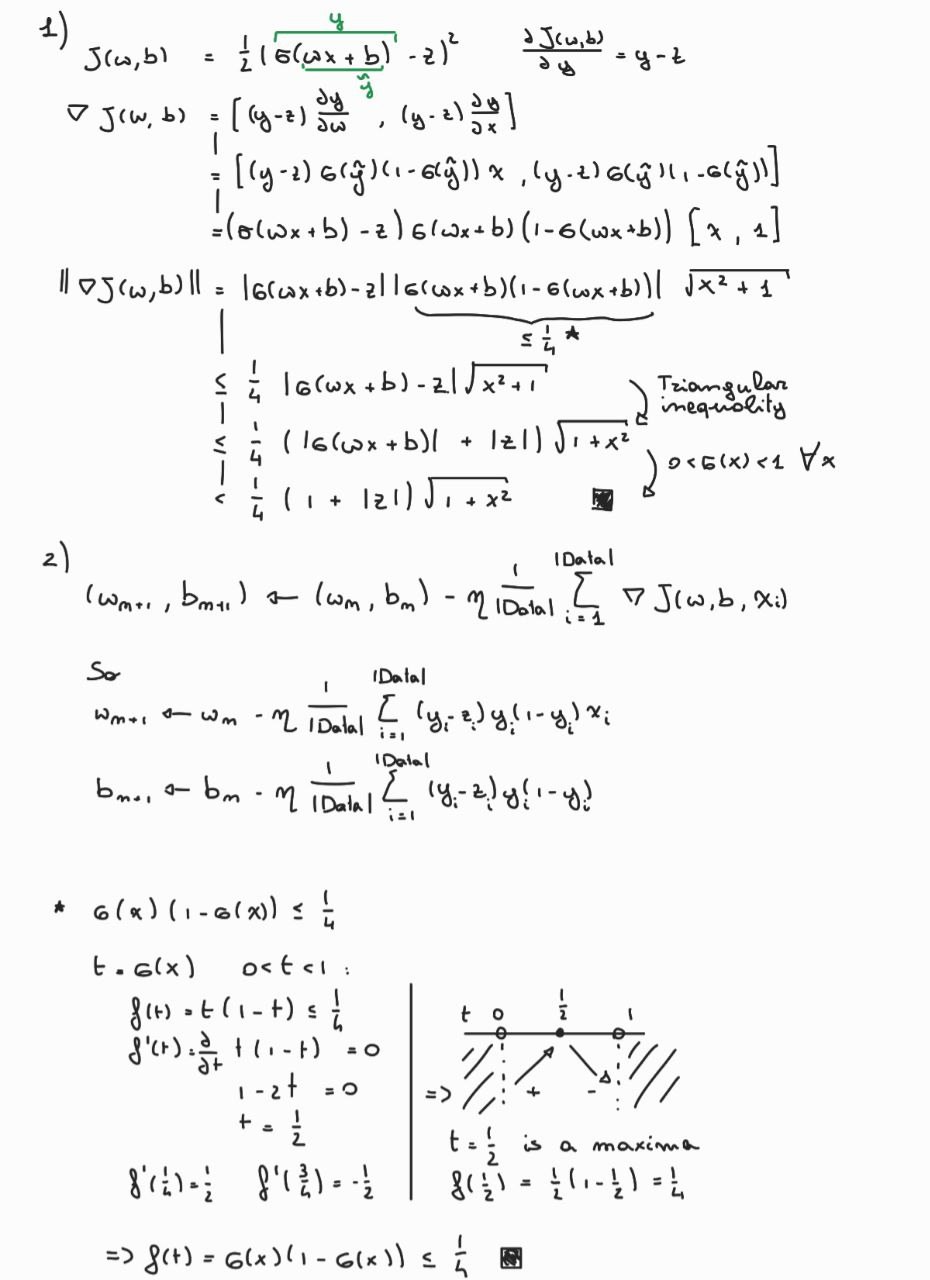